In [30]:

from pylab import *
import numpy as np
import pickle
import pandas as pd
import sys
sys.path.insert(0, "../../lib")# add the library folder to the path I look for modules
import latexify# execute function latexify for plots coherent with latex
latexify.latexify(columns=2)
#from mpmath import *


Cavity curves

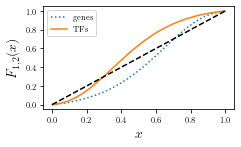

In [31]:
def fon(g,c,d,alpha,p):
    return  p*exp(-(alpha*c*g*exp((d*(-1 + g))/alpha)))*(-1 + g*exp((d*(-1 + g))/alpha) + exp(alpha*c*g*exp((d*(-1 + g))/alpha)))
def fTF(t,c,d,alpha,p):
    return  p*(-1 + t + exp(alpha*c*t))*exp(-(alpha*c*t) + (d*(-1 + p*exp(-(alpha*c*t))*(-1 + t + exp(alpha*c*t))))/alpha)
def foff(g,c,d,alpha,p):
    return   p + (alpha - p)*exp(-(c*g*exp(d*(-1 + g))))*(-1 + g*exp(d*(-1 + g)) + exp(c*g*exp(d*(-1 + g))))
#latexify.latexify(columns=3)
c=3
d=3
alpha=1
p=1
x=linspace(0,1,100)
plot(x,fon(x,c,d,alpha,p),ls=':',label='genes')
plot(x,fTF(x,c,d,alpha,p),label='TFs')
plot(x,x,'k--')
legend()
xlabel('$x$',fontsize=14)
ylabel('$F_{1,2}(x)$',fontsize=14)
tight_layout()
#savefig('out2.pdf')

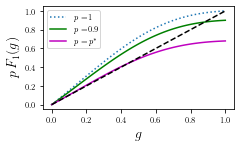

In [34]:
#latexify.latexify(columns=2)
c=3
d=1
alpha=1
p=0.9
xs=linspace(0,1,100)
plot(x,fon(x,c,d,alpha,1),ls=':',label='$p=$1')
plot(x,fon(x,c,d,alpha,p),c='g',label='$p=$'+str(p))
p = 1/(c+1)/np.exp(-d)
plot(x,fon(x,c,d,alpha,p),c='m',label='$p=p^*$')
plot(x,x,'k--')
legend()
xlabel('$g$',fontsize=14)
ylabel('$p\,F_1(g)$',fontsize=14)
tight_layout()
#savefig('perturbed.pdf')

(-0.01, 0.02)

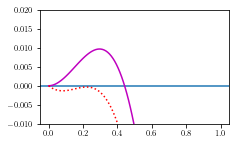

In [29]:
plt.axhline(0)
plot(x,fon(x,c,d,alpha,p)-x,c='m',label='$p=p^*$')
plot(x,fon(x,c,d,alpha,p-0.025)-x,ls = ':',c='r',label='$p=p^*$')
plt.ylim(-0.01,0.02)

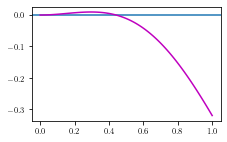

In [35]:
plt.axhline(0)
plot(x,p*fon(x,c,d,alpha,1)-x,c='m')

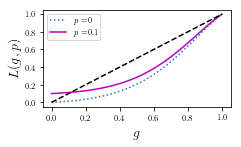

In [38]:
latexify.latexify(columns=2)
c=1
d=3
alpha=1
p=0.9
x=linspace(0,1)
plot(x,foff(x,c,d,alpha,0),':',label='$p=$0')
plot(x,foff(x,c,d,alpha,1-p),'m',label='$p=$0.1')
plot(x,x,'k--')
legend()
xlabel('$g$',fontsize=14)
ylabel('$L(g,p)$',fontsize=14)
tight_layout()
#savefig('perturbed1.pdf')

### For inset

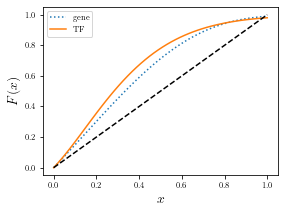

In [16]:
latexify.latexify(fig_width=4,fig_height=3,columns=1)
c=3
d=1
alpha=1
p=0.99
x=linspace(0,1)
plot(x,fon(x,c,d,alpha,p),':',label='gene')
plot(x,fTF(x,c,d,alpha,p),label='TF')
plot(x,x,'k--')
legend()
xlabel('$x$',fontsize=14)
ylabel('$F(x)$',fontsize=14)
tight_layout()
#savefig('fon_1.pdf')


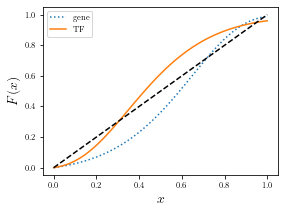

In [27]:
latexify.latexify(fig_width=4,fig_height=3,columns=1)
c=3
d=3
alpha=1
p=0.99
x=linspace(0,1)
plot(x,fon(x,c,d,alpha,p),':',label='gene')
plot(x,fTF(x,c,d,alpha,p),label='TF')
plot(x,x,'k--')
legend()
xlabel('$x$',fontsize=14)
ylabel('$F(x)$',fontsize=14)
tight_layout()
#savefig('fon_2.pdf')



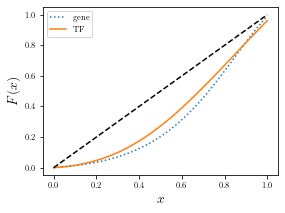

In [29]:
latexify.latexify(fig_width=4,fig_height=3,columns=1)
c=1
d=3
alpha=1
p=0.99
x=linspace(0,1)
plot(x,fon(x,c,d,alpha,p),':',label='gene')
plot(x,fTF(x,c,d,alpha,p),label='TF')
plot(x,x,'k--')
legend()
xlabel('$x$',fontsize=14)
ylabel('$F(x)$',fontsize=14)
tight_layout()
#savefig('fon_3.pdf')



In [16]:
class type2:
    def __init__(self, d,lam,p):
        self.d = d
        self.lam = lam
        self.p = p
    def f_TF(self,x):
        return -(self.p*np.exp(-(self.d*x))*(-1 + x + np.exp(self.d*x))*lerchphi(self.p*np.exp(-(self.d*x))*(-1 + x + np.exp(self.d*x)),self.lam,2)) + polylog(self.lam,self.p*np.exp(-(self.d*x))*(-1 + x + np.exp(self.d*x)))
    def f_g(self,x):
        return self.p*exp(-(self.d*(-(x*lerchphi(x,self.lam,2)) + polylog(self.lam,x)))) *(-1 + exp(self.d*(-(x*lerchphi(x,self.lam,2)) + polylog(self.lam,x))) - x*lerchphi(x,self.lam,2) + polylog(self.lam,x))

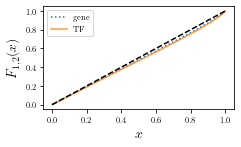

In [20]:
xs = np.linspace(0,1,100)
model = type2(0.8,1.1,1)
plt.plot(xs,[model.f_g(x) for x in xs],':',label = 'gene')
plt.plot(xs,[model.f_TF(x) for x in xs],alpha = 0.8,label = 'TF')
plt.plot(xs,xs,'k--')
xlabel('$x$',fontsize=14)
ylabel('$F_{1,2}(x)$',fontsize=14)
plt.legend()
plt.tight_layout()
#plt.savefig('model2_1.pdf')

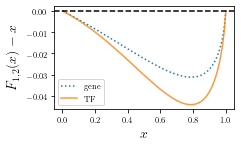

In [25]:
xs = np.linspace(0,1,100)
model = type2(0.8,1.1,1)
plt.plot(xs,[model.f_g(x)-x for x in xs],':',label = 'gene')
plt.plot(xs,[model.f_TF(x)-x for x in xs],alpha = 0.8,label = 'TF')
plt.axhline(0,ls ='--',color = 'k')
xlabel('$x$',fontsize=14)
ylabel('$F_{1,2}(x)-x$',fontsize=14)
plt.legend()
plt.tight_layout()
#plt.savefig('model2_1_inset.pdf')

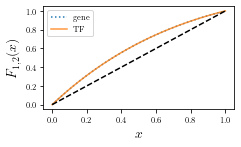

In [80]:
xs = np.linspace(0,1,100)
model = type2(0.8,5,1)
plt.plot(xs,[model.f_g(x) for x in xs],':',label = 'gene')
plt.plot(xs,[model.f_TF(x) for x in xs],alpha = 0.8,label = 'TF')
plt.plot(xs,xs,'k--')
plt.legend()
xlabel('$x$',fontsize=14)
ylabel('$F_{1,2}(x)$',fontsize=14)
plt.tight_layout()
#plt.savefig('model2_2.pdf')

In [68]:
xs = np.linspace(0,1,100)
model = type2(0.8,1.25,1)
gon= [model.f_g(x) for x in xs]
TFon= [model.f_g(x) for x in xs]


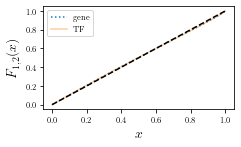

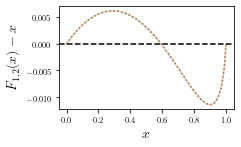

In [77]:
plt.plot(xs,gon,':',label = 'gene')
plt.plot(xs,TFon,label = 'TF',alpha = 0.4)
plt.plot(xs,xs,'k--')
xlabel('$x$',fontsize=14)
ylabel('$F_{1,2}(x)$',fontsize=14)
plt.tight_layout()
plt.legend()
plt.savefig('model2.pdf')


plt.figure()
plt.plot(xs,gon-xs ,':',label = 'gene')
plt.plot(xs,TFon-xs ,label = 'TF',alpha = 0.4)
plt.axhline(0,ls = '--',color = 'k')
xlabel('$x$',fontsize=14)
ylabel('$F_{1,2}(x)-x$',fontsize=14)
plt.tight_layout()
plt.savefig('model2_inset.pdf')

In [11]:
model.f_g(0)

TypeError: loop of ufunc does not support argument 0 of type mpf which has no callable exp method

In [15]:
p = 0.2
lam = 3
x = 0.1
d = 2
p*exp(-(d*(-(x*lerchphi(x,lam,2)) + polylog(lam,x)))) #*(-1 + np.exp(d*(-(x*lerchphi(x,lam,2)) + polylog(lam,x))) - x*lerchphi(x,lam,2) + polylog(lam,x))

TypeError: loop of ufunc does not support argument 0 of type mpf which has no callable exp method

In [9]:
exp(-(0.1*(-(0.5*lerchphi(0.5,0.2,2)))))

mpf('1.0852942483920638')

In [7]:
exp(1)

mpf('2.7182818284590451')